## Primeira Semana de Estágio


### Implementar o cutout, mixup, cutmix

In [165]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize
from PIL import Image

#### - mostrar imagens

In [166]:
def display_images(image_1, image_2,final_image,method):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image_1)
    plt.title('Image 1')
    
    plt.subplot(1, 3, 2)
    plt.imshow(image_2)
    plt.title('Image 2')
    
    plt.subplot(1, 3, 3)
    plt.imshow(final_image)
    plt.title(method)
    
    plt.show()

In [167]:
def display_image(image_1,final_image,method):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title('Image 1')
    
    plt.subplot(1, 2, 2)
    plt.imshow(final_image)
    plt.title(method)
    
    plt.show()

#### - Implementação do cutout

'''CIFAR10/100 were normalized using per-channel mean
and standard deviation. When required, we apply the standard data augmentation scheme for these datasets [5]. Images are first zero-padded with 4 pixels on each side to obtain a 40 × 40 pixel image, then a 32 × 32 crop is randomly
extracted. Images are also randomly mirrored horizontally
with 50% probability.
Based on these validation results we select
a cutout size of 16x16 pixels to use on CIFAR-10 and a cutout size of 8x8 pixels for CIFAR-100 when training on
the full datasets.'''

In [168]:
def cutout(image, size):
    h, w = image.shape[:2]

    y1 = np.random.randint(0, h-size)
    y2 = y1 + size
    x1 = np.random.randint(0, w-size)
    x2 = x1 + size
    position(y1,x1)
    
    image[y1:y2, x1:x2] = 0
    
    return image


#### - Implementação do mixup

Motivated by these issues, we introduce a simple and data-agnostic data augmentation routine, termed mixup (Section 2). In a nutshell, mixup constructs virtual training examples:
- ``` X = λx1 + (1 − λ)xj , where xi, xj are raw input vectors ```
- ```y˜ = λyi + (1 − λ)yj , where yi, yj are one-hot label encodings```

(xi
, yi) and (xj , yj ) are two examples drawn at random from our training data, and λ ∈ [0, 1].
Therefore, mixup extends the training distribution by incorporating the prior knowledge that linear
interpolations of feature vectors should lead to linear interpolations of the associated targets. mixup
can be implemented in a few lines of code, and introduces minimal computation overhead.

In [169]:
def mixup(image_1, image_2, label_1, label_2):
    
    lamba = np.random.uniform(0, 1)

    mixed_image = lamba * image_1 + (1 - lamba) * image_2
    
    mixed_label = lamba * label_1 + (1 - lamba) * label_2
    
    return mixed_image.astype(np.uint8), mixed_label

#### - Implementação do cutmix

In [170]:
#Hiperparametros do cutmix
alpha = 1

In [171]:
def position(y,x):
    global coordenates
    coordenates = (y,x)

In [172]:
def cutmix(image_1, image_2, label_1, label_2,size):

    lamba = np.random.beta(alpha, alpha)

    cutout_image = cutout(image_1.copy(), size)
    y,x = coordenates
    
    mixed_image = cutout_image
    mixed_image[y:y+size, x:x+size] = image_2[y:y+size, x:x+size]
    
    mixed_label = lamba * label_1 + (1 - lamba) * label_2
    
    return mixed_image, mixed_label

In [173]:
def cutmix_(image_1, image_2, label_1, label_2):

    lamba = np.random.beta(alpha, alpha)
    
    #mask
    H,W = image_1.shape[0], image_1.shape[1]
    
    rw = int(W * np.sqrt(1 - lamba))
    rh = int(H * np.sqrt(1- lamba))
    rx = np.random.randint(0,W - rw)
    ry = np.random.randint(0,H - rh)
    '''
    rx = np.random.randint(0,W)
    ry = np.random.randint(0,H)
    rw = int(W * np.sqrt(1 - lamba))
    rh = int(H * np.sqrt(1- lamba))
    '''
    
    mask = np.ones_like(image_1)
    mask[ry:ry+rh, rx:rx+rw] = 0

    mixed_image = mask * image_1 + (1 - mask) * image_2

    mixed_label = lamba * label_1 + (1 - lamba) * label_2

    return mixed_image, mixed_label

- a mascara tem que ser proporcional à imagem original ??


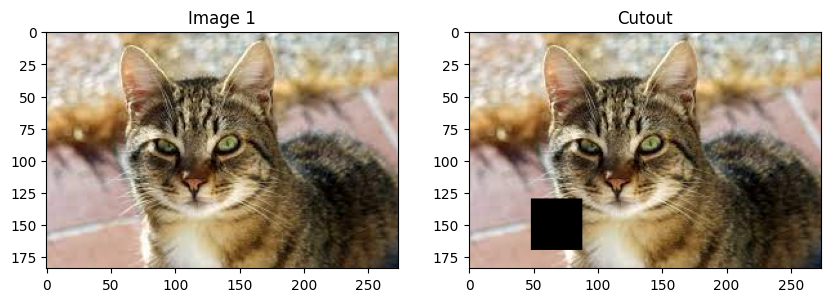

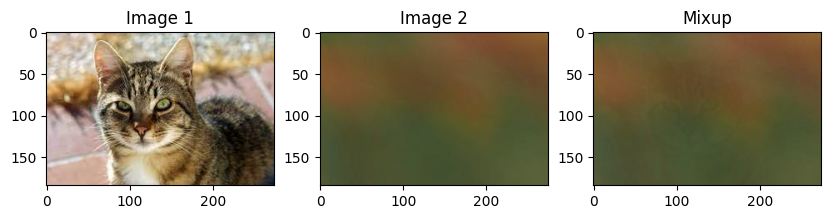

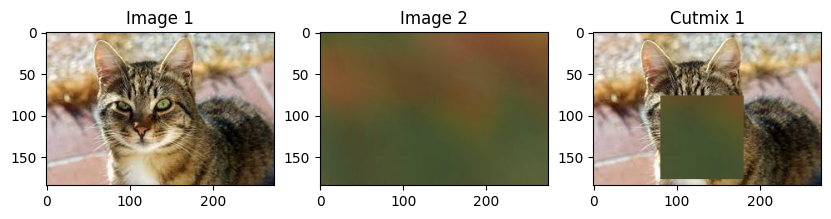

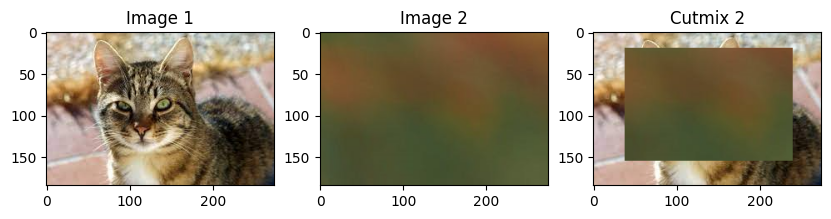

In [174]:
image1 = io.imread('exemplo.jpg')  
image2 = io.imread('exemplo1.jpg') 

label1 = np.array([0, 1])  
label2 = np.array([1, 0])  

image_cutout = cutout(image1.copy(), 40)
image_mixup,_ = mixup(image1.copy(), image2.copy(), label1, label2)
image_cutmix,_ = cutmix(image1.copy(), image2.copy(), label1, label2, 100)
image_cutmix_,_ = cutmix_(image1.copy(), image2.copy(), label1, label2)

display_image(image1, image_cutout, 'Cutout')
display_images(image1, image2, image_mixup, 'Mixup')
display_images(image1, image2, image_cutmix, 'Cutmix 1')
display_images(image1, image2, image_cutmix_, 'Cutmix 2')

## Segunda Semana de Estágio

### Reunião


In [175]:
'''
adjacent ordinal mixup (https://arxiv.org/pdf/2007.06667.pdf)

def adjacent_ordinal_mixup(lista_imagens):
    k1 = ...  # [0,k-2]
    k2 = k1+1
    ....



ordinal mixup (airton tiago)

def ordinal_mixup(lista_imagens, tau):
    num_classes = len(lista_imagens)
    ...

def softmax(x):
    return x

def exp(center_class, num_classes, tau):
    kk = np.arange(0, num_classes)
    return softmax(np.exp(-np.abs(center_class-kk)/tau))

# escolher aleatoriamente (de forma uniforme) uma classe [0, num_classes[
# probabilities = exp(...)
# x = sum(probabilities * x)


##################################################



def cutmix_ordinal(lista_imagens):
    probabilities = exp(...)
    (o que discutimos no papel)
'''

'\nadjacent ordinal mixup (https://arxiv.org/pdf/2007.06667.pdf)\n\ndef adjacent_ordinal_mixup(lista_imagens):\n    k1 = ...  # [0,k-2]\n    k2 = k1+1\n    ....\n\n\n\nordinal mixup (airton tiago)\n\ndef ordinal_mixup(lista_imagens, tau):\n    num_classes = len(lista_imagens)\n    ...\n\ndef softmax(x):\n    return x\n\ndef exp(center_class, num_classes, tau):\n    kk = np.arange(0, num_classes)\n    return softmax(np.exp(-np.abs(center_class-kk)/tau))\n\n# escolher aleatoriamente (de forma uniforme) uma classe [0, num_classes[\n# probabilities = exp(...)\n# x = sum(probabilities * x)\n\n\n##################################################\n\n\n\ndef cutmix_ordinal(lista_imagens):\n    probabilities = exp(...)\n    (o que discutimos no papel)\n'

In [176]:
def calcular_distance(H,W,area):
    raiz_discriminante = math.sqrt((2*(H + W))**2 - 16* area)
    distance = (-2*(H + W) + raiz_discriminante) / - 8
    return distance

In [177]:
def probability_side(x,y,probabilities):
    probability = 0
    for k in range(x,y):
        probability += probabilities[k]
    return probability

In [183]:
def imagens_seguintes(num_inicial, num_final, valor, probabilities, H , W, list_images):
    total_area = H*W
    y = 0
    x = 0
    image_final = list_images[num_inicial+valor].copy()
    image_final = image_final[y:H, x:W]
    #plt.imshow(image_final)

    print('num_final-num_inicial + 1:', num_final-num_inicial + 1)
    for k in range(num_inicial+valor, num_final+valor, valor):
        img_area = total_area*probabilities[k]
        print('img_area:', img_area)
        distance = int(calcular_distance(H,W,img_area))
        print('distance:', distance)
        num_inicial += valor
        H -= 2*distance
        W -= 2*distance
        
        x += distance
        y += distance
        
        image_final[y:y+H, x:x+W] = list_images[k][y:y+H, x:x+W]
        
    return image_final


In [179]:
#def exp(num_classes, center_class, tau):
#    return softmax(np.abs(center_class - num_classes) / tau)

def exp(num_classes, center_class, tau):
    # retorna um vector (com tamanho num_classes) com a distribuição def
    # probabilidades para cada classe [0,num_classes[.
    x = np.arange(num_classes)
    return softmax(-np.abs(center_class - x) / tau)

def mixup_images(list_images, lam):
    mixup_image = np.sum(np.array(list_images) * lam[:, None, None, None], 0)
    return mixup_image

def create_lam(list_images):
    size = len(list_images)
    lam = np.zeros(size)
    return size, lam

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def ordinal_mixup(list_images):
    size, lam = create_lam(list_images)

    class_1 = np.random.randint(0, size)
    class_2 = np.random.randint(0, size)

    beta = np.random.beta(alpha, alpha)

    lam[class_1] = beta
    lam[class_2] = 1 - beta

    mixup_image = mixup_images(list_images, lam)
    return mixup_image, lam

def ordinal_adjacent_mixup(list_images):
    size, lam = create_lam(list_images)

    class_1 = np.random.randint(0, size - 2)
    class_2 = class_1 + 1

    beta = np.random.beta(alpha, alpha)

    lam[class_1] = beta
    lam[class_2] = 1 - beta

    mixup_image = mixup_images(list_images, lam)
    return mixup_image, lam

def ordinal_exponencial_mixup(list_images, tau):
    size, lam = create_lam(list_images)
    l = np.random.randint(0, size) + 1
    k = np.arange(1, size+1)
    lam = exp(k,l, tau)

    mixup_image = mixup_images(list_images, lam)
    return mixup_image, lam


In [184]:
def ordinal_cutmix(list_images,tau):
    num_classes = len(list_images)
    x = 0
    y = 0
    center_class = np.random.randint(0, num_classes)
    probabilities = exp(num_classes,center_class, tau)
    H, W = list_images[0].shape[0:2]
    total_area = H*W
    image_final = list_images[0].copy()

    for i in range(0,num_classes-1):
        img_area = total_area*probabilities[i]
        distance = int(calcular_distance(H,W,img_area))
        H -= 2*distance
        W -= 2*distance
        #mask = np.ones_like(list_images[i])
        x += distance
        y += distance
        #mask[y:y+H, x:x+W] = 0
        #image_final = mask * image_final + (1 - mask) * list_images[i+1]
        image_final[y:y+H, x:x+W] = list_images[i+1][y:y+H, x:x+W]

    return image_final

def ordinal_cutmix_jaime(list_images, tau):
    num_classes = len(list_images)
    #center_class = np.random.randint(0, num_classes)
    #probabilities = exp(num_classes,center_class, tau)
    center_class = 3
    probabilities = [0.15, 0.15, 0.3, 0.4, 0, 0, 0]

    H, W = list_images[0].shape[0:2]
    total_area = H*W
    image_final = list_images[center_class].copy()

    probability_left = np.sum(probabilities[0:center_class]) #probability_side(0,center_class,probabilities)
    probability_rigth = np.sum(probabilities[center_class+1:])

    area_left = total_area * probability_left
    area_rigth = total_area * probability_rigth

    #supondo que o imagem vai ser um quadrado
    H_left = int(np.sqrt(area_left))
    H_rigth = int(np.sqrt(area_rigth))

    print("central :",center_class)
    print("probabilities:", probabilities)
    print("H_left:", H_left)

    image_left = imagens_seguintes(center_class, 0, -1, probabilities, H_left , H_left, list_images)

    #def imagens_seguintes(num_inicial, num_final, valor, probabilities, H , W, list_images):


    return image_left

In [181]:
def load_images(folder):
    images = []
    for root, _, files in os.walk(folder):
        for filename in files:
            if filename.endswith(".BMP"):
                img = io.imread(os.path.join(root, filename))
                img = resize(img,(256, 256))
                images.append(img)
    return images


list_images = load_images('smear')

central : 3
probabilities: [0.15, 0.15, 0.3, 0.4, 0, 0, 0]
H_left: 198
num_final-num_inicial + 1: -2
img_area: 11761.199999999999
distance: 16
img_area: 5880.599999999999
distance: 9
img_area: 5880.599999999999
distance: 10


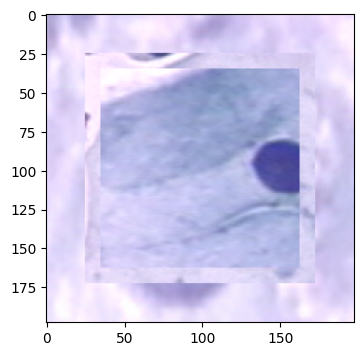

In [185]:
images_final = ordinal_cutmix_jaime(list_images,0.5)
plt.figure(figsize=(20, 4))
plt.imshow(images_final)
plt.show()